In [1]:
import pandas as pd
from datetime import datetime
import requests
import matplotlib.pyplot as plt

In [5]:
noaa_token = 'OHjwLXxTHGLMndZOtFnxoPPCCvhSJHFw'


Weather Data Summary:

Available measurements: ['PRCP', 'TMAX', 'TMIN']

Date range: 2023-07-22 to 2024-02-23

Summary statistics:
type         PRCP        TMAX        TMIN
count  215.000000  217.000000  217.000000
mean     0.050233   67.211982   50.737327
std      0.138697    7.986171    7.089386
min      0.000000   52.000000   36.000000
25%      0.000000   60.000000   45.000000
50%      0.000000   68.000000   52.000000
75%      0.000000   72.000000   57.000000
max      0.840000   91.000000   64.000000


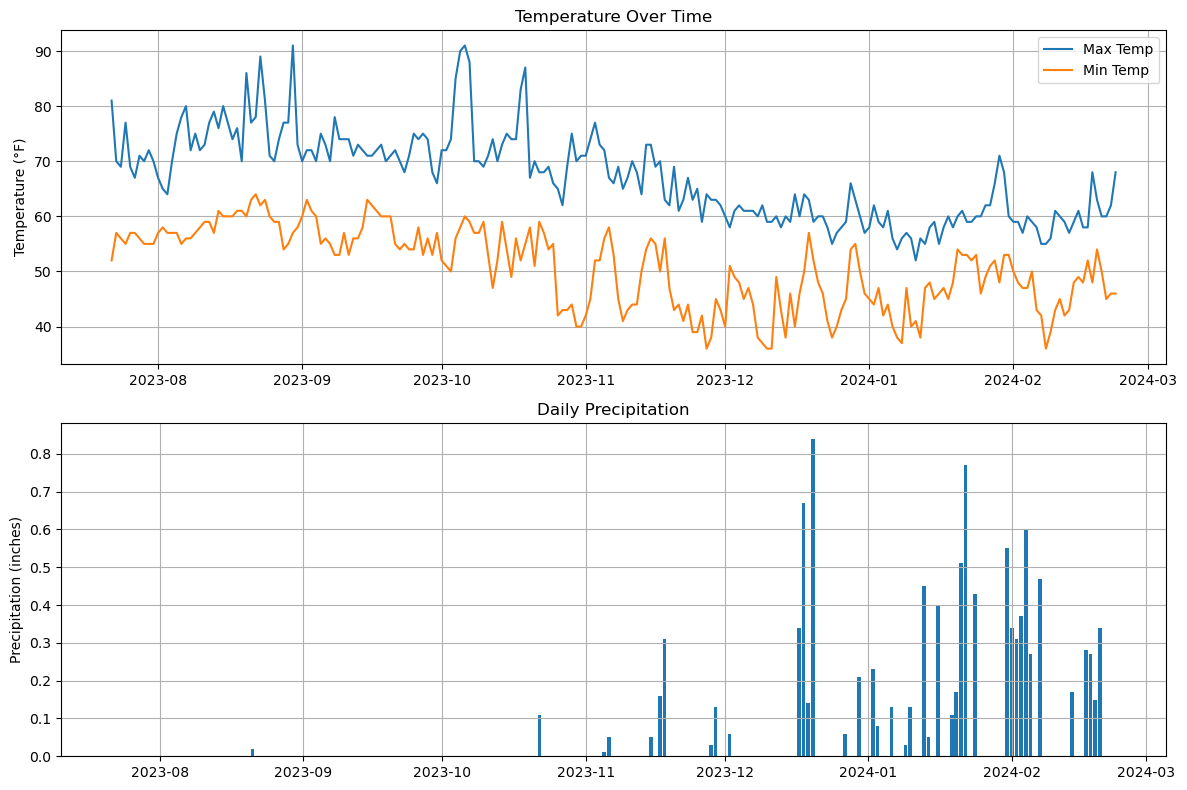

In [10]:
# Oakland International Airport
station_id = 'GHCND:USW00023230'
start_date = '2023-07-22'
end_date = '2024-02-23'

data_params = {
    'datasetid': 'GHCND',
    'stationid': station_id,
    'startdate': start_date,
    'enddate': end_date,
    'limit': 1000,
    'units': 'standard',
    'datatypeid': 'TMAX,TMIN,PRCP,TAVG'
}

try:
    response = requests.get(
        f'{base_url}data',
        headers=headers,
        params=data_params
    )
    
    if response.status_code == 200:
        weather_data = response.json()
        
        records = []
        for item in weather_data.get('results', []):
            records.append({
                'date': pd.to_datetime(item['date']).date(),
                'type': item['datatype'],
                'value': item['value']
            })
        
        df = pd.DataFrame(records)
        weather_df = df.pivot(index='date', columns='type', values='value')
        
        for col in ['TMAX', 'TMIN', 'TAVG']:
            if col in weather_df.columns:
                weather_df[col] = weather_df[col]
        
        if 'PRCP' in weather_df.columns:
            weather_df['PRCP'] = weather_df['PRCP']
        
        print("\nWeather Data Summary:")
        print("\nAvailable measurements:", weather_df.columns.tolist())
        print("\nDate range:", weather_df.index.min(), "to", weather_df.index.max())
        print("\nSummary statistics:")
        print(weather_df.describe())
        
        # Save to CSV
        weather_df.to_csv('weather_data_airport.csv')
        
        # Create plots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        # Temperature plot
        if 'TMAX' in weather_df.columns and 'TMIN' in weather_df.columns:
            ax1.plot(weather_df.index, weather_df['TMAX'], label='Max Temp')
            ax1.plot(weather_df.index, weather_df['TMIN'], label='Min Temp')
            ax1.set_title('Temperature Over Time')
            ax1.set_ylabel('Temperature (°F)')
            ax1.legend()
            ax1.grid(True)
        
        # Precipitation plot
        if 'PRCP' in weather_df.columns:
            ax2.bar(weather_df.index, weather_df['PRCP'], label='Precipitation')
            ax2.set_title('Daily Precipitation')
            ax2.set_ylabel('Precipitation (inches)')
            ax2.grid(True)
            
        plt.tight_layout()
        plt.show()
        
except Exception as e:
    print(f"Error: {e}")